$\Huge Code$ $\hspace{0.1cm}$ $\Huge to$ $\hspace{0.1cm}$ $\Huge create$ $\hspace{0.1cm}$ $\Huge a$ $\hspace{0.1cm}$ $\Huge White$ $\hspace{0.1cm}$ $\Huge Noise$ $\hspace{0.1cm}$ $\Huge map$ $\hspace{0.1cm}$ $\Huge :$ 

# TO DO : 

# Modules :

In [3]:
import numpy as np 
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

# Functions : 

## Compute pixel resolution : 

Geeting the size of an healpy pixel depending on the $N_{SIDE}$ of the map : 
The Healpy map is basically a sphere composed of a given number of pixels. The solid angle of tis sphere is 1.  Therefore we have that the surface of one pixel, is the surface of the sphere divided by the number of pixels : 

$S_{pix}= \frac{4\pi \times 1}{N_{pix}}$ and $N_{pix}=12\times N_{SIDE}^{2}$

Thefore the resolution of one pixel is the squarre root of the surface : 

$S_{pix}= \sqrt{\frac{4\pi \times 1}{N_{pix}}}$

now the solid angle is in radians, to put it in degree we multiply by $180/\pi$ and to put it in arcmin we multiply by $60$ as $1$ arcmin = $1/60$ of a degree. 

In [4]:
def pix_reso(nside,arcmin=True): 
    
            
    """
    Compute the resolution of Healpy pixels in function of the nside of the map.  

    Parameters
    ----------
    
    nside : int
        Nside, number of separation of the healpy blocks. 
    arcmin : bool
        if True return the resolution in arcmin, otherwise in radians. 
        
    Returns
    -------
    float
        The resolution of one healpy pixel. 

    """
    
    #Number of pixels : 
    N_pix = hp.pixelfunc.nside2npix(nside)
    
    #Compute the unit : 
    if arcmin == True :        
        multi=(180*60/np.pi)        
    else:        
        multi=1
        
    #Compute the resolution :     
    reso = np.sqrt(((4*np.pi)/N_pix)*multi**2)
    
    #Feedback user : 
    print('The pixel resolution has been computed')

    return reso

## Create a white noise map : 

In [14]:
def WN_map(nside,data_path,file_out,noise,unit_noise,arcmin,units,pictures_path): 

        
    """
    Function which create a White noise map for a given noise/arcmin or noise/radians.  

    Parameters
    ----------
    
    nside : int
        Nside, number of separation of the healpy blocks. 
    data_path : str
        Path where the datas will be stored.
    file_out : str
        Name of the White noise healpy map.
    noise : float 
        noise value desired in any units by radians or arcmin.
    unit_noise : float 
        resolution of the noise, for exemple 1' or 1 radians. 
    arcmin : bool 
        if true mean that the noise is given in /arcmin. 
    units : str 
        units of the noise 
    pictures_path : str 
        path where the pictures will be stored.
        
    Returns
    -------
    array
        Array contaning the Variarion of intensity produced by tSZ over the fequencies. 

    """
    
    #Compute the average noise in each pixel : 
    noise = (noise * unit_noise)/pix_reso(nside,arcmin)
        
    #Create White-noise map :
    Npix = hp.pixelfunc.nside2npix(nside) #Compute the number of pixels
    m =  np.random.normal(0,noise,Npix) #Random normal distribution centered over the desired noise
    
    #Display and save the distribution: 
    plt.hist(m,200,normed=True) #Display histogram of the distribution
    plt.title('$Noise$ $distribution$')
    plt.xlabel('$Noise$ $in$ '+ units)
    plt.ylabel('$Distribution$')
    plt.savefig(pictures_path + 'WN_PDF_'+str(int(noise))+units+'.png')

    #Display map and save map: 
    WN_map = hp.write_map(data_path + file_out,m, overwrite=True) #Save the distribution into a healpy map
    hp.mollview(m, title="White Noise map : n= "+ str(int(noise)) + units, norm='hist',unit=units)
    plt.savefig(pictures_path + 'WN_map_'+str(int(noise))+units+'.png') 
    plt.show()
    
    return WN_map 

The pixel resolution has been computed


/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/users/mcharmetant/anaconda3/lib/python3.6/site-packages/mat

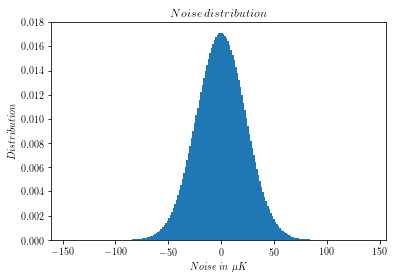

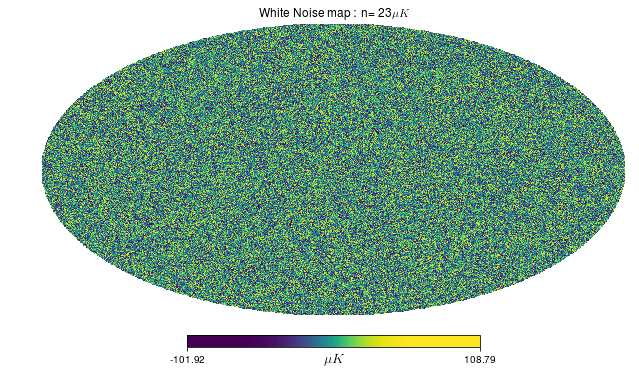

In [17]:
WN_map(nside=8192,data_path='/vol/arc3/data1/sz/CCATp_sky_model/workspace_maude/',file_out='WN_128.fits',noise=10.,unit_noise=1.,arcmin=True,units='$\mu K$',pictures_path='/vol/arc3/data1/sz/CCATp_sky_model/workspace_maude/')